# Media Case Study 
Problem Statement: A digital media company (similar to Voot, Hotstar, Netflix, etc.) had launched a show. Initially, the show got a good response, but then witnessed a decline in viewership. The company wants to figure out what went wrong.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
df = pd.read_csv("mediacompany.csv")
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


In [3]:
# Droping the Column with Nan values 
df =df.drop(['Unnamed: 7'],axis=1)
df.head(2)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0


In [4]:
# Converting date to datetime 
df["Date"] = pd.to_datetime(df["Date"])

In [5]:
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0


In [6]:
df.shape

(80, 7)

In [7]:
# Adding extra columns , to derive since the show started 
df['day'] =[x+1 for x in range(df.shape[0])]
df.head(2)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2


<AxesSubplot:xlabel='day'>

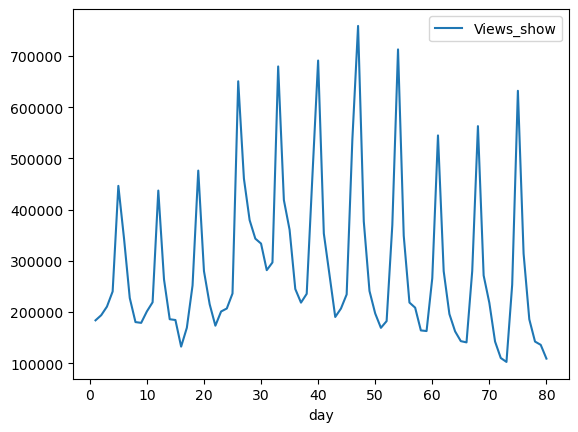

In [8]:
df.plot.line(x='day', y='Views_show')

Text(0, 0.5, 'View on shows')

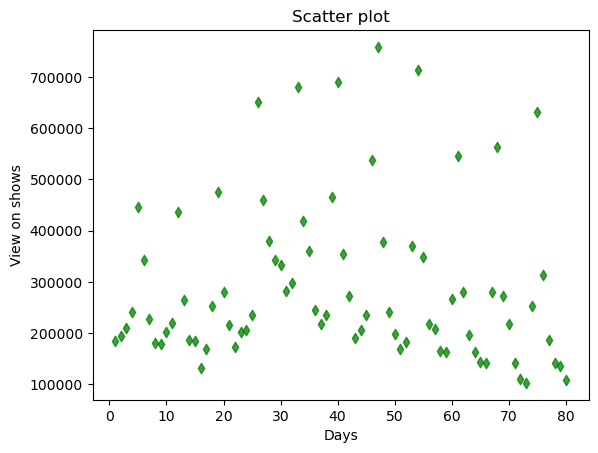

In [17]:
colors = 'green'
area = np.pi*9 
plt.scatter(df.day , df.Views_show , marker='d' , s=area , c=colors ,  alpha = 0.75)
plt.title('Scatter plot')
plt.xlabel('Days')
plt.ylabel('View on shows')

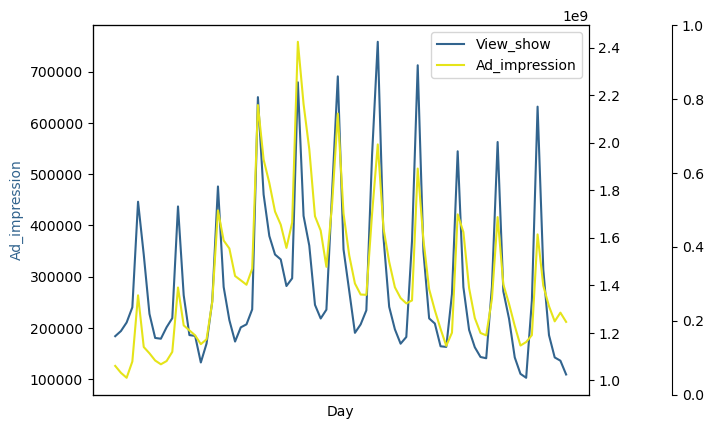

In [38]:
# Ploting Views_show and Ad_impressions VS days 

fig = plt.figure()
host = fig.add_subplot(1,1,1)

par1 = host.twinx()
par2 = host.twinx()

host.set_xlabel('Day')
host.set_ylabel('View_show')
host.set_ylabel('Ad_impression')

color1 = plt.cm.viridis(0.32)
color2 = plt.cm.viridis(0.96)
color3 = plt.cm.viridis(0)

p1, = host.plot(df.day , df.Views_show , color = color1 , label = 'View_show')
p2, = par1.plot(df.day , df.Ad_impression , color= color2 , label = "Ad_impression")

lns = [p1,p2]
host.legend(handles = lns , loc= 'best')

# right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))   

# no x-ticks                 
par2.xaxis.set_ticks([])

# Sometimes handy, same for xaxis
#par2.yaxis.set_ticks_position('right')

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())

plt.savefig("pyplot_multiple_y-axis.png", bbox_inches='tight')

In [48]:
# Derived Metrics
# Weekdays are taken such that 1 corresponds to Sunday and 7 to Saturday
# Generate the weekday variable

df['weekday'] = (df['day']+3)%7
df.weekday.replace(0,7, inplace = True)
df['weekday'] = df['weekday'].astype(int)
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,4
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,5
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,6
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,7
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1


# Running first model : Weekday & Visitors

In [49]:
x = df[['Visitors','weekday']]
Y = df['Views_show']

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
lm = LinearRegression()

In [52]:
lm.fit(x,Y)

LinearRegression()

In [72]:
import statsmodels.api as sm

x = sm.add_constant(x)
lm_1 = sm.OLS(Y,x).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Fri, 17 Mar 2023   Prob (F-statistic):           1.53e-14
Time:                        13:17:28   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

In [73]:
# Create Weekend variable, with value 1 at weekends and 0 at weekdays
 
def cond(i):
    if i % 7 ==5 :return 1
    elif i % 7 == 4 : return 1
    else: return 0
    
df['weekend'] = [cond(i) for i in df['day']]
df['day'].astype(int)
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,Lag_Views,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,0,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,0,183738,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,0,193763,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,1,210479,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,1,240061,1


# Running second model:  Visitors & Weekend

In [74]:
x =df[['Visitors','weekend']]
Y = df['Views_show']

In [75]:
x = sm.add_constant(x)
lm_2 = sm.OLS(Y,x).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Fri, 17 Mar 2023   Prob (F-statistic):           2.51e-12
Time:                        13:17:40   Log-Likelihood:                -1041.3
No. Observations:                  80   AIC:                             2089.
Df Residuals:                      77   BIC:                             2096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.833e+04   1.01e+05     -0.875      0.3

<AxesSubplot:>

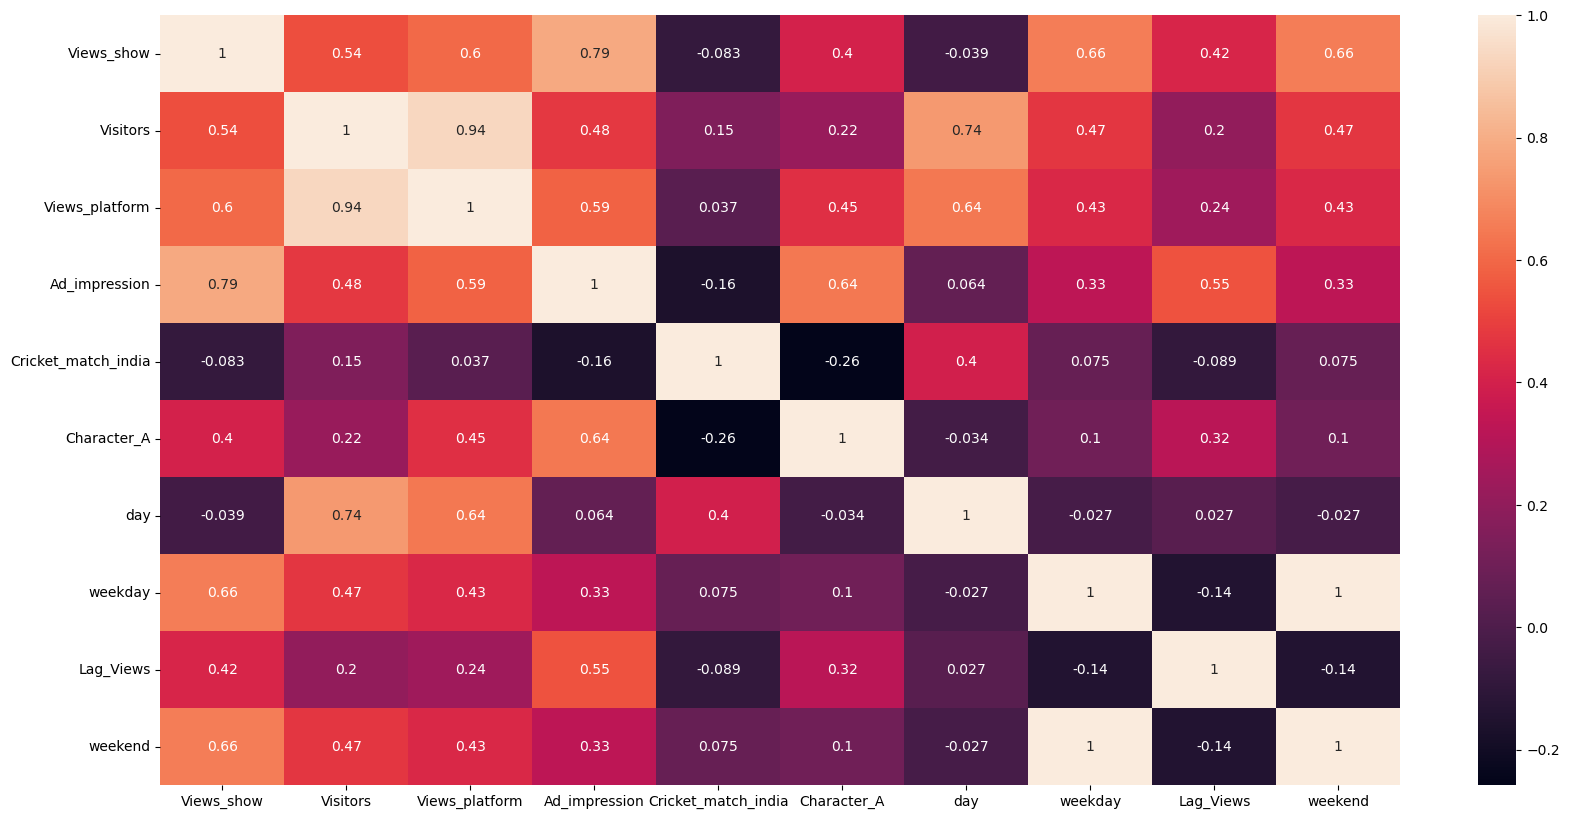

In [76]:
plt.figure(figsize = (20,10))       
sns.heatmap(df.corr(),annot = True)

## Running third model : Visitors, weekend & Character_A

In [77]:
x = df[['Visitors','weekend','Character_A']]
Y = df['Views_show']

In [78]:
x = sm.add_constant(x)
lm_3 = sm.OLS(Y,x).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Fri, 17 Mar 2023   Prob (F-statistic):           1.53e-14
Time:                        13:17:53   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

In [79]:
# Create lag variable

df['Lag_Views'] = np.roll(df['Views_show'], 1)
df.Lag_Views.replace(108961,0, inplace=True)

In [80]:
df.head(3)

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,weekday,Lag_Views,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,0,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,0,183738,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,0,193763,0


## Running fourth model :Visitors, Character_A, Lag_views & weekday

In [81]:
x = df[['Visitors','Character_A','Lag_Views','weekend']]
Y = df['Views_show']

In [82]:
x = sm.add_constant(x)
lm_4 = sm.OLS(Y,x).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     53.46
Date:                Fri, 17 Mar 2023   Prob (F-statistic):           3.16e-21
Time:                        13:19:38   Log-Likelihood:                -1015.1
No. Observations:                  80   AIC:                             2040.
Df Residuals:                      75   BIC:                             2052.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -2.98e+04   7.43e+04     -0.401      

## Running fifth model : Character_A, weekend & Views_platfor

In [83]:
x = df[['weekend','Character_A','Views_platform']]
Y = df['Views_show']

In [84]:
x = sm.add_constant(x)
lm_5 = sm.OLS(Y,x).fit()
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     38.24
Date:                Fri, 17 Mar 2023   Prob (F-statistic):           3.59e-15
Time:                        13:22:01   Log-Likelihood:                -1032.3
No. Observations:                  80   AIC:                             2073.
Df Residuals:                      76   BIC:                             2082.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -1.205e+05   9.97e+04     -1.

## Running sixth model :  Character_A, weekend & Visitors

In [85]:
x = df[['weekend','Character_A','Visitors']]
Y = df['Views_show']

In [86]:
x = sm.add_constant(x)
lm_6 = sm.OLS(Y,x).fit()
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Fri, 17 Mar 2023   Prob (F-statistic):           1.53e-14
Time:                        13:23:12   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

# Running seventh model : Character_A, weekend, Visitors & Ad_impressions

In [87]:
x = df[['weekend','Character_A','Visitors','Ad_impression']]
Y = df['Views_show']

In [88]:
x= sm.add_constant(x)
lm_7 = sm.OLS(Y,x).fit()
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     76.40
Date:                Fri, 17 Mar 2023   Prob (F-statistic):           1.10e-25
Time:                        13:24:52   Log-Likelihood:                -1004.1
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.834e+05   6.97e+04     -4.067

## Running eight model : Character_A, weekend & Ad_impressions 

In [89]:
x = df[['weekend','Character_A','Ad_impression']]
Y = df['Views_show']

In [90]:
x = sm.add_constant(x)
lm_8 = sm.OLS(Y,x).fit()
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Fri, 17 Mar 2023   Prob (F-statistic):           1.05e-26
Time:                        13:25:54   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.661e+05   4.74e+04     -5.609

In [92]:
df['ad_impression_million'] = df['Ad_impression']/1000000

## Running ninth model : Character_A, weekend, Visitors, ad_impressions_million & Cricket_match_india

In [93]:
x = df[['weekend','Character_A','ad_impression_million','Cricket_match_india']]
Y = df['Views_show']

In [95]:
 x = sm.add_constant(x)
lm_9 = sm.OLS(Y,x).fit()
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     76.59
Date:                Fri, 17 Mar 2023   Prob (F-statistic):           1.02e-25
Time:                        13:28:51   Log-Likelihood:                -1004.0
No. Observations:                  80   AIC:                             2018.
Df Residuals:                      75   BIC:                             2030.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.633e+

## Running tenth model: Character_A, weekend & ad_impressions_million

In [96]:
x = df[['weekend','Character_A','ad_impression_million']]
Y = df['Views_show']

In [97]:
x= sm.add_constant(x)
lm_10 = sm.OLS(Y,x).fit()
print(lm_10.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Fri, 17 Mar 2023   Prob (F-statistic):           1.05e-26
Time:                        13:30:37   Log-Likelihood:                -1004.2
No. Observations:                  80   AIC:                             2016.
Df Residuals:                      76   BIC:                             2026.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.661e+

# Making predictions using model 

In [106]:
x = df[['weekend','Character_A','ad_impression_million']]
x = sm.add_constant(x)
Pred_views = lm_10.predict(x)

In [102]:
from sklearn.metrics import mean_squared_error, r2_score

In [109]:
mse = mean_squared_error(df.Views_show,Pred_views)
r_square = r2_score(df.Views_show,Pred_views)
print('Mean_Squared_Error :' , mse)
print('r_square_value :', r_square)

Mean_Squared_Error : 4677651616.2534075
r_square_value : 0.802643446857565


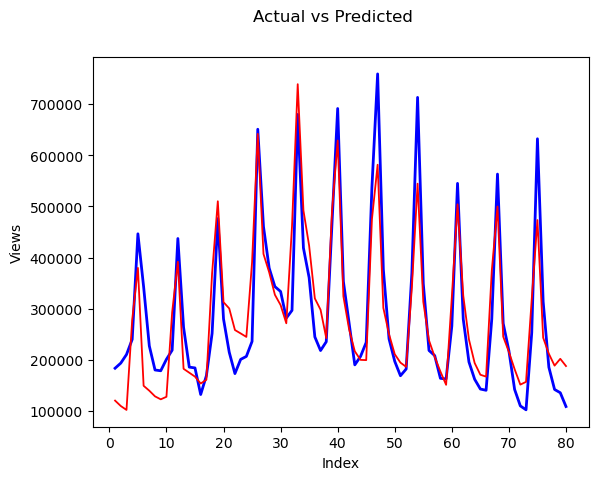

In [112]:
c = [i for i in range(1,81)]
fig = plt.figure()
plt.plot(c,Y,color='blue',linewidth=2,linestyle='-')
plt.plot(c,Pred_views,color='red',linewidth=1.3,linestyle='-')
fig.suptitle('Actual vs Predicted')
plt.xlabel('Index')
plt.ylabel('Views')
plt.show()

Text(0, 0.5, 'Views_show-Predicted_views')

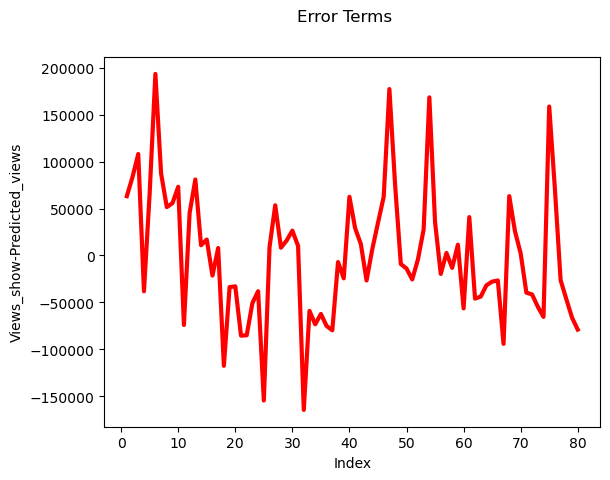

In [115]:
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,df.Views_show-Pred_views, color="red", linewidth=3, linestyle="-")
fig.suptitle('Error Terms')            
plt.xlabel('Index')                      
plt.ylabel('Views_show-Predicted_views')               

## Making prediction using sixth model 

In [127]:
x = df[['weekend','Character_A','Visitors']]
x = sm.add_constant(x)
Predicted_views = lm_6.predict(x)

In [128]:
mse = mean_squared_error(df.Views_show, Predicted_views)
r_squared = r2_score(df.Views_show, Predicted_views)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 9815432480.45152
r_square_value : 0.5858734080979341


Text(0, 0.5, 'Views')

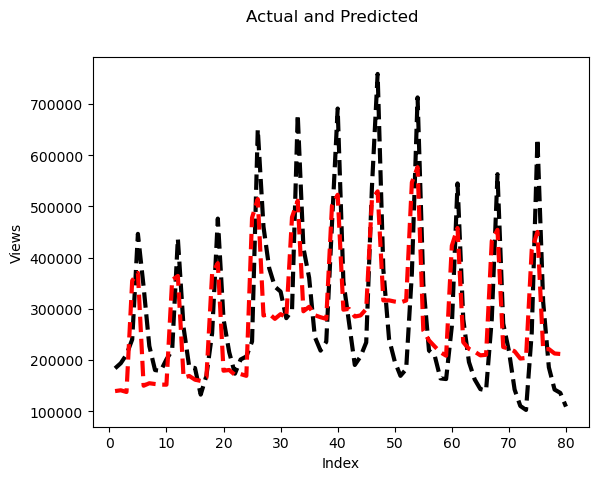

In [132]:
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,df.Views_show, color="black", linewidth=3, linestyle="dashed")
plt.plot(c,Predicted_views, color="red",  linewidth=3, linestyle="dashed")
fig.suptitle('Actual and Predicted')             
plt.xlabel('Index')                             
plt.ylabel('Views')          

Text(0, 0.5, 'Views_show-Predicted_views')

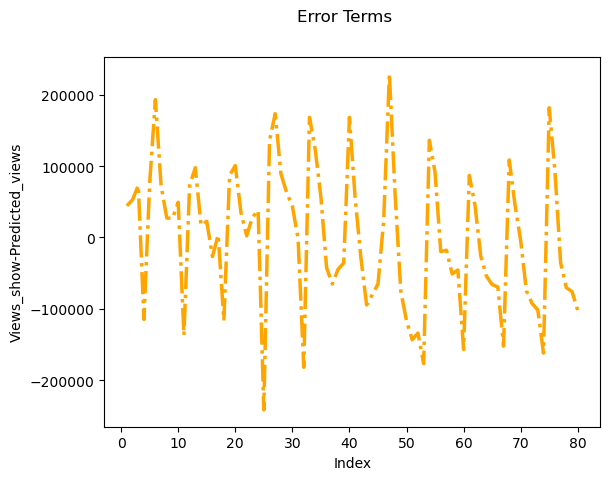

In [136]:
c = [i for i in range(1,81,1)]
fig = plt.figure()
plt.plot(c,df.Views_show-Predicted_views, color="orange", linewidth=2.5, linestyle="dashdot")
fig.suptitle('Error Terms')            
plt.xlabel('Index')                      
plt.ylabel('Views_show-Predicted_views') 